In [20]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Load dataset
df = pd.read_csv("Apple Dataset.csv")
print("Dataset Shape:", df.shape)


Dataset Shape: (10954, 7)


In [22]:
# Show first few rows
print(df.head())

         Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.099058  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093890  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086999  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089152   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091737   73449600


In [23]:
# Check basic info and stats
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10954 entries, 0 to 10953
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10954 non-null  object 
 1   Open       10954 non-null  float64
 2   High       10954 non-null  float64
 3   Low        10954 non-null  float64
 4   Close      10954 non-null  float64
 5   Adj Close  10954 non-null  float64
 6   Volume     10954 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 599.2+ KB
None
               Open          High           Low         Close     Adj Close  \
count  10954.000000  10954.000000  10954.000000  10954.000000  10954.000000   
mean      21.530877     21.761904     21.308220     21.544072     20.747506   
std       44.458386     44.931856     44.013578     44.492483     44.038943   
min        0.049665      0.049665      0.049107      0.049107      0.037900   
25%        0.296875      0.303571      0.290179      0.296875      0

In [24]:
# Remove Adj Close
df = df.drop(columns=['Adj Close'])

In [25]:
# Convert Date column to datetime and sort it
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')


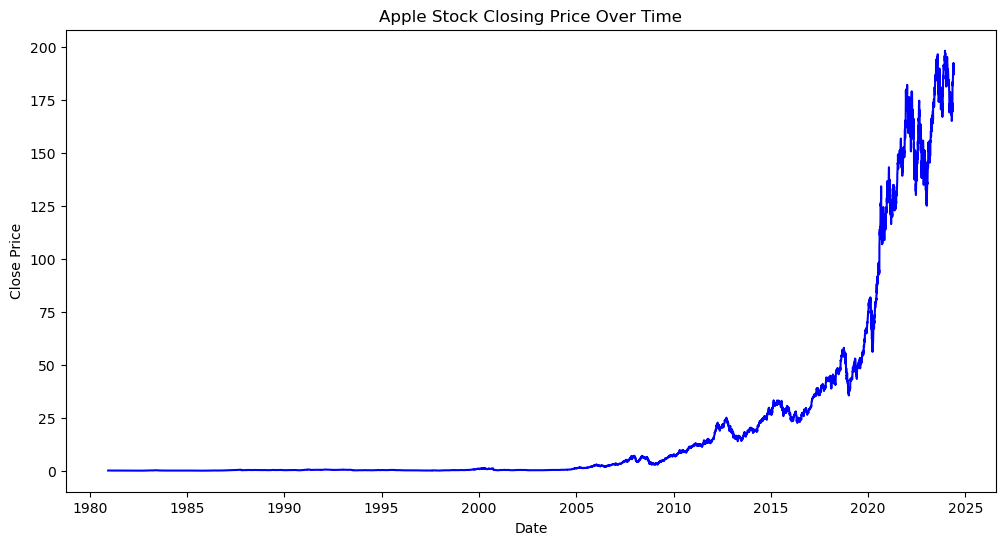

In [26]:
# Plot closing price over time

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], color='blue')
plt.title('Apple Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [27]:
# Create previous day columns for prediction
df['Prev_Open'] = df['Open'].shift(1)
df['Prev_High'] = df['High'].shift(1)
df['Prev_Low'] = df['Low'].shift(1)
df['Prev_Close'] = df['Close'].shift(1)
df['Prev_Volume'] = df['Volume'].shift(1)

In [28]:
# Remove first row (it will have NaN after shifting)
df = df.dropna()


In [29]:
# Set input and output columns
X = df[['Prev_Open', 'Prev_High', 'Prev_Low', 'Prev_Close', 'Prev_Volume']]
y = df['Close']

In [30]:
# Split data into train and test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [31]:
# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Make predictions
y_pred = model.predict(X_test)

In [33]:
# Check model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

R² Score: 0.9988992168149593
MAE: 1.206935034698883
RMSE: 1.9253818091066732


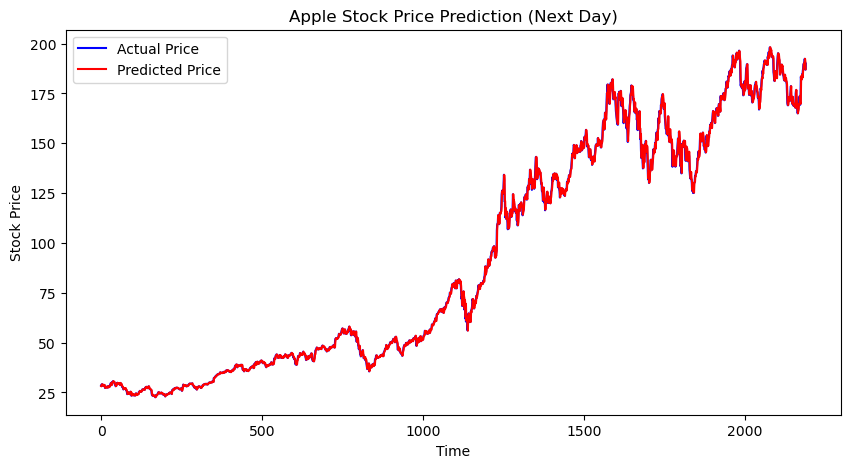

In [34]:
# Plot actual vs predicted prices
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual Price', color='blue')
plt.plot(y_pred, label='Predicted Price', color='red')
plt.title('Apple Stock Price Prediction (Next Day)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## 🧩 Conclusion
The model successfully predicts **next-day Apple stock closing prices** using previous-day market data (Open, High, Low, Close, Volume).  
It achieved an **R² score of 0.9989**, indicating a very strong predictive performance.  

This project demonstrates preprocessing, feature engineering, and evaluation of a **Linear Regression model** for financial forecasting.

---

## 🚀 Future Work
In the next phase, I plan to experiment with a more advanced time-series model like **LSTM**, which captures sequential dependencies better and may further improve accuracy.